#Import Module

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
drive.mount('/content/gdrive')
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.utils import shuffle

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Load dataset

In [2]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/df_preprocessing.csv')
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Month,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


#Split train, validation, test dataset

In [3]:
sample_count=df.shape[0]
training_sample_count=int(0.8*sample_count)
validation_sample_count=int(0.1*sample_count)
test_sample_count=int(sample_count-training_sample_count-validation_sample_count)

#Shuffling data

In [4]:
df_shuffled=shuffle(df, random_state=42)
df_shuffled=df_shuffled.reset_index(drop=True)
df_shuffled.shape

(700, 15)

In [5]:
x=df_shuffled.iloc[:,:14]
y=df_shuffled.iloc[:,14:]
print(y)

     Absenteeism Time in Hours
0                            8
1                            8
2                            8
3                            2
4                            1
..                         ...
695                          5
696                          3
697                          8
698                          3
699                          2

[700 rows x 1 columns]


In [6]:
y.median()

Absenteeism Time in Hours    3.0
dtype: float64

In [7]:
y_format=np.where(y>3, 1, 0)
df_shuffled['Absenteeism']=y_format
df_checkpoint1=df_shuffled.drop(['Absenteeism Time in Hours'], axis = 1).copy()
df_checkpoint1.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Month,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism
0,0,1,0,0,3,1,179,22,40,343.253,22,1,2,0,1
1,0,0,0,1,9,4,179,26,30,261.756,19,1,0,0,1
2,0,0,0,1,3,1,179,22,40,244.387,22,1,2,0,1
3,0,0,0,1,3,1,291,50,32,343.253,23,0,0,0,0
4,0,0,0,1,11,0,291,31,40,284.031,25,0,1,1,0


In [8]:
y_train = df_checkpoint1['Absenteeism']
print(y_train)

0      1
1      1
2      1
3      0
4      0
      ..
695    1
696    0
697    1
698    0
699    0
Name: Absenteeism, Length: 700, dtype: int64


In [9]:
# Split the data
from sklearn.model_selection import train_test_split
 
X, x_test, Y, y_test = train_test_split(x, y_train, test_size=0.1, shuffle=True, random_state=42)

In [10]:
scaler=StandardScaler()
scaled_input_train=scaler.fit_transform(X)

In [11]:
# Set the input and output sizes
input_size = 14
output_size = 1
hidden_layer_size = 50
    
 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh', input_dim = input_size), 
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),     
    tf.keras.layers.Dense(output_size, activation='sigmoid')
])
 
 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
batch_size = 1000
max_epochs = 2000
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
 
history=model.fit(scaled_input_train, Y, 
          batch_size=batch_size,
          epochs=max_epochs,
          validation_split=0.2,
          verbose = 2, 
          )  

Epoch 1/2000
1/1 - 1s - loss: 0.7174 - accuracy: 0.5040 - val_loss: 0.6951 - val_accuracy: 0.5159 - 1s/epoch - 1s/step
Epoch 2/2000
1/1 - 0s - loss: 0.6997 - accuracy: 0.5238 - val_loss: 0.6787 - val_accuracy: 0.5952 - 98ms/epoch - 98ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.6835 - accuracy: 0.5397 - val_loss: 0.6636 - val_accuracy: 0.6190 - 47ms/epoch - 47ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.6687 - accuracy: 0.5813 - val_loss: 0.6499 - val_accuracy: 0.6270 - 97ms/epoch - 97ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.6551 - accuracy: 0.6052 - val_loss: 0.6374 - val_accuracy: 0.6587 - 67ms/epoch - 67ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.6427 - accuracy: 0.6190 - val_loss: 0.6260 - val_accuracy: 0.6587 - 50ms/epoch - 50ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.6314 - accuracy: 0.6468 - val_loss: 0.6158 - val_accuracy: 0.6667 - 67ms/epoch - 67ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.6210 - accuracy: 0.6528 - val_loss: 0.6067 - val_accuracy: 0.6984 - 39ms/epoch - 39ms/step
Epoch 9/2000
1/1 - 0

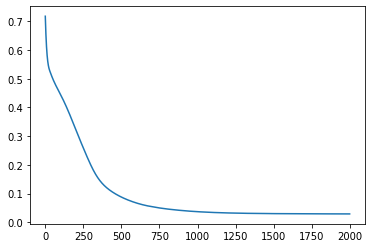

In [12]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [13]:
scaler_input_test=scaler.transform(x_test)

In [14]:
test_loss, test_accuracy = model.evaluate(scaler_input_test, y_test)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

3/3 [==============================] - 0s 4ms/step - loss: 2.8274 - accuracy: 0.8000

Test loss: 2.83. Test accuracy: 80.00%
